In [105]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
plt.rcParams["figure.figsize"] = (12,8)

In [106]:
infile_qcd = open("qcd_100000_pt_250_500.pkl",'rb')
qcd_data = pickle.load(infile_qcd)
infile_higgs = open("higgs_100000_pt_250_500.pkl", 'rb')
higgs_data = pickle.load(infile_higgs)

## Problem 1

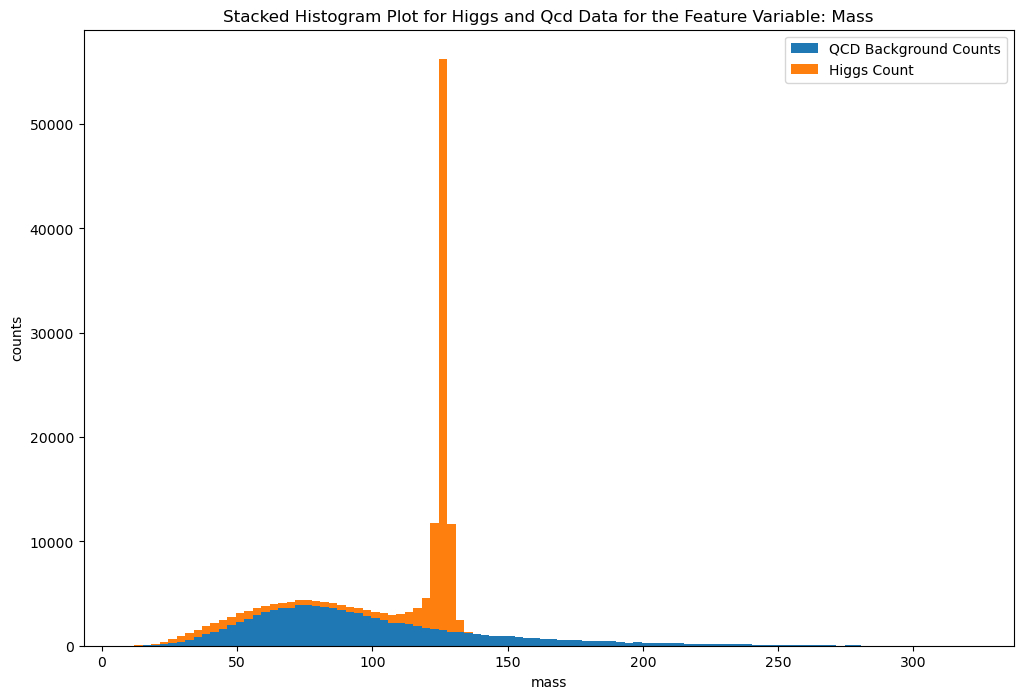

In [107]:
data = [qcd_data["mass"], higgs_data["mass"]]
plt.hist(data, bins = 100, stacked = True, label = ["QCD Background Counts", "Higgs Count"])
plt.ylabel("counts")
plt.xlabel("mass")
plt.legend()
plt.title("Stacked Histogram Plot for Higgs and Qcd Data for the Feature Variable: Mass")
plt.show()


#### Calculating Significance

What is the significance of getting a signal of 2050 (n_higgs + n_qcd)  provided a QCD background of poisson distribution with parameter as 2000?

In [108]:
probability = stats.poisson.sf(2050, 2000)
sig = stats.norm.isf(probability)
sig

1.1282230087754423

The significance of getting 2050 jets is 1.28

NHiggs/sqrt(NQCD) = 50/sqrt(2000) = 1.118

## Problem2

To find the best cut let's start with making 3 cuts. And calculating the significance of the signal after making the 3 cuts.

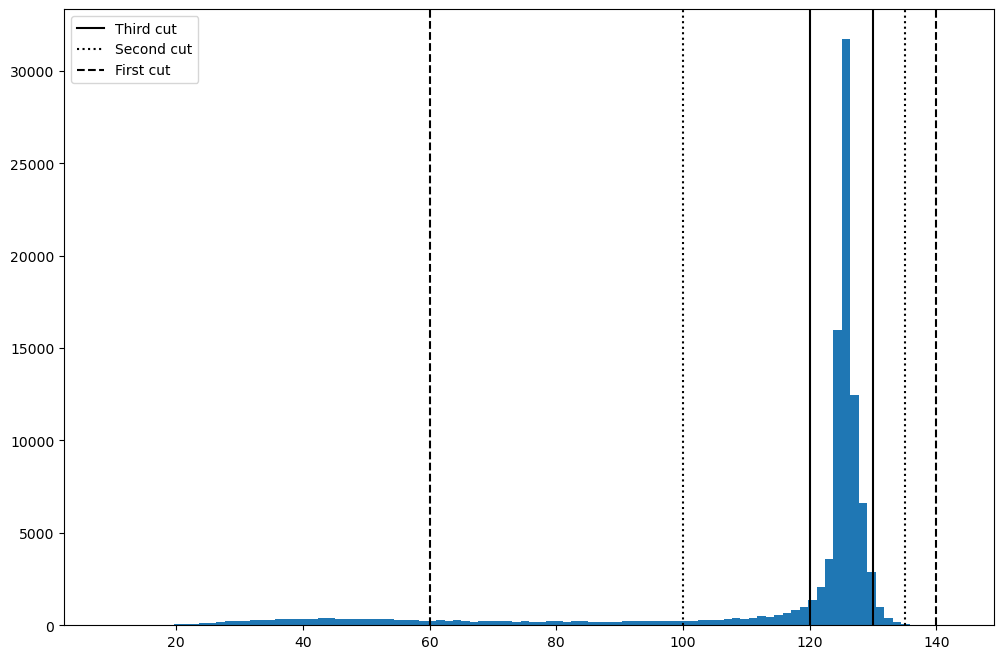

In [109]:
plt.hist(higgs_data["mass"], bins = 100)
plt.axvline(120, linestyle='-', c='k', label='Third cut')
plt.axvline(130, linestyle='-', c='k')
plt.axvline(100, linestyle=':', c='k', label='Second cut')
plt.axvline(135, linestyle=':', c='k')
plt.axvline(140, linestyle='--', c='k', label='First cut')
plt.axvline(60, linestyle='--', c='k')
plt.legend()
plt.show()

In [110]:
higgs_cut1 = higgs_data[(higgs_data["mass"]>= 60) & (higgs_data["mass"] <= 140)]

In [111]:
qcd_cut1 = qcd_data[(qcd_data["mass"] >= 60) & (qcd_data["mass"] <= 140)]

In [112]:
higgs_cut2 = higgs_data[(higgs_data["mass"]>= 100) & (higgs_data["mass"] <= 135)]

In [113]:
qcd_cut2 = qcd_data[(qcd_data["mass"] >= 100) & (qcd_data["mass"] <= 135)]

In [114]:
higgs_cut3 = higgs_data[(higgs_data["mass"]>= 120) & (higgs_data["mass"] <= 130)]

In [115]:
qcd_cut3 = qcd_data[(qcd_data["mass"] >= 120) & (qcd_data["mass"] <= 130)]

#### For the First Cut

count of higg events after the cut:

In [116]:
cnt_higgs1 = len(higgs_cut1) * (.0005)
cnt_higgs1

45.794000000000004

count of qcd events after the cut:

In [117]:
cnt_qcd1 = len(qcd_cut1) * (.02)
cnt_qcd1

1348.48

Probability of Signal

In [118]:
p = stats.poisson.sf(cnt_higgs1 + cnt_qcd1, mu = cnt_qcd1)
p

0.10552262805397887

Significance of the signal:

In [119]:
stats.norm.isf(p)

1.2506964227214632

#### For the Second Cut

count of higg events after the cut:

In [120]:
cnt_higgs2 = len(higgs_cut2) * (.0005)
cnt_higgs2

42.447

In [121]:
cnt_qcd2 = len(qcd_cut2) * (.02)
cnt_qcd2

418.90000000000003

Probability of Signal

In [122]:
p = stats.poisson.sf(cnt_higgs2 + cnt_qcd2, mu = cnt_qcd2)
p

0.019913171775463978

Significance of the signal:

In [123]:
stats.norm.isf(p)

2.055545521696857

#### For the Third Cut

count of higg events after the cut:

In [124]:
cnt_higgs3 = len(higgs_cut3) * (.0005)
cnt_higgs3

37.923500000000004

In [125]:
cnt_qcd3 = len(qcd_cut3) * (.02)
cnt_qcd3

98.02

Probability of Signal

In [126]:
p = stats.poisson.sf(cnt_higgs3 + cnt_qcd3, mu = cnt_qcd3)
p

0.0001639429276417787

Significance of the signal:

In [127]:
stats.norm.isf(p)

3.592209678084678

The cut that gave us the maximum significance was that with mass >= 120 and mass <= 130

## Problem 3

In [144]:
def plot_stacked(feature):
    bins = 100
    qcd_feature_data = qcd_data[feature]
    higgs_feature_data = higgs_data[feature]
    feature_data = [qcd_data[feature], higgs_data[feature]]
    
    qcd_feature_cut_data = qcd_cut3[feature]
    higgs_feature_cut_data = higgs_cut3[feature]
    feature_cut_data = [qcd_cut3[feature], higgs_cut3[feature]]
    
    plt.suptitle('Stacked QCD background for ' + feature)
    # Without cutting data
    plt.subplot(2, 1, 1)
    plt.hist(feature_data, bins=100, stacked=True, label=['QCD Background counts', 'Higgs counts'])
    plt.title('Stacked QCD background counts and Higgs counts')
    plt.xlabel(f' {feature}')
    plt.ylabel('Event counts')
    plt.legend()
    
    plt.show()
    
    # After slicing
    plt.subplot(2, 2, 1)
    plt.hist(feature_cut_data, bins=100, stacked=True, label=['QCD Background counts', 'Higgs counts'])
    plt.title('Stacked QCD background counts and Higgs counts cut at mass')
    plt.xlabel(f' {feature}')
    plt.ylabel('Event counts')
    plt.legend()
    plt.show()
    

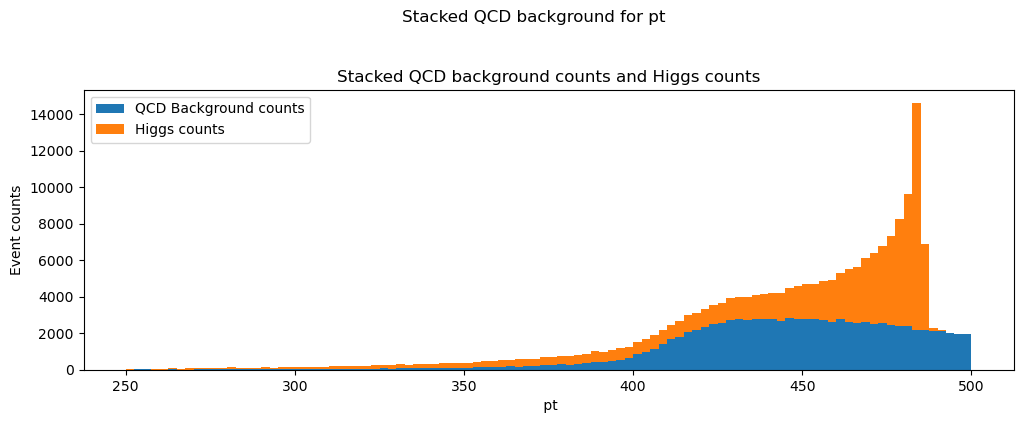

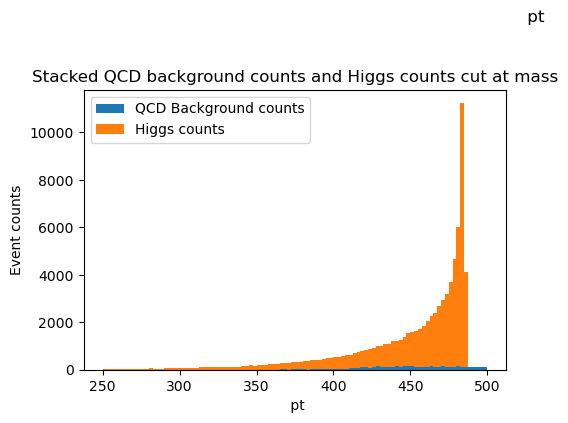

In [145]:
plot_stacked("pt")

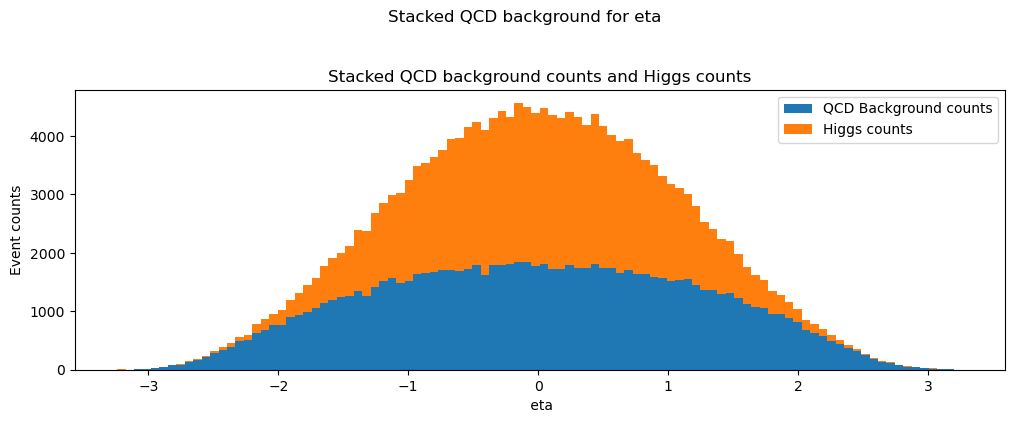

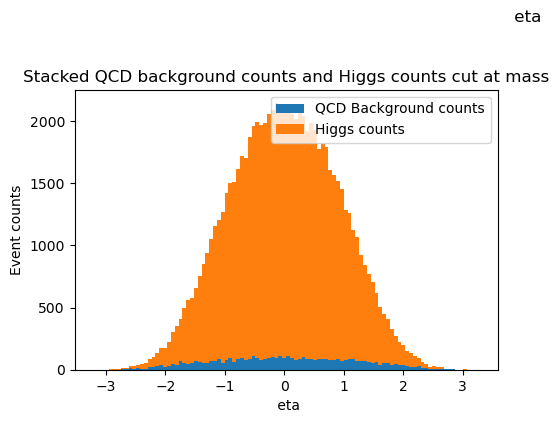

In [146]:
plot_stacked("eta")

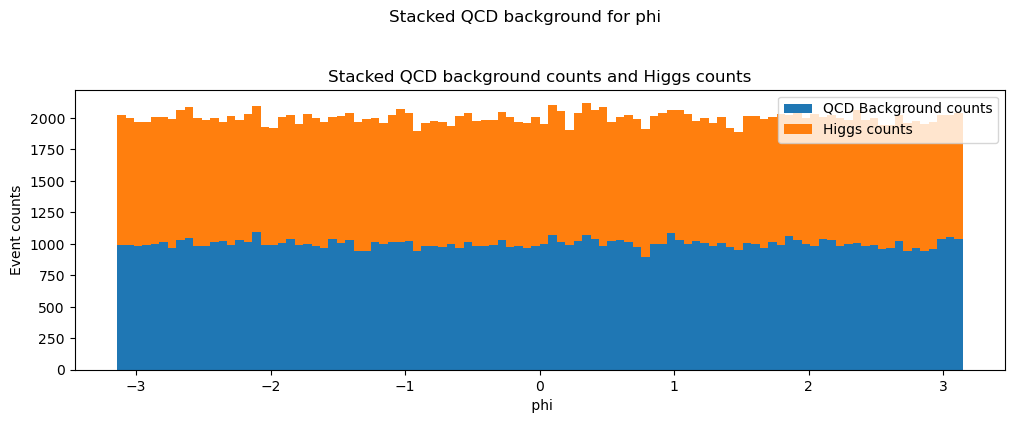

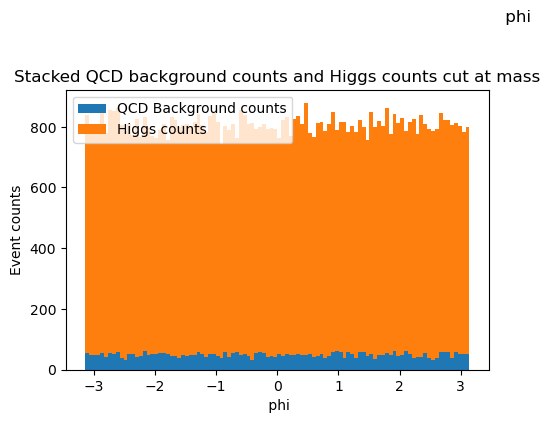

In [147]:
plot_stacked("phi")

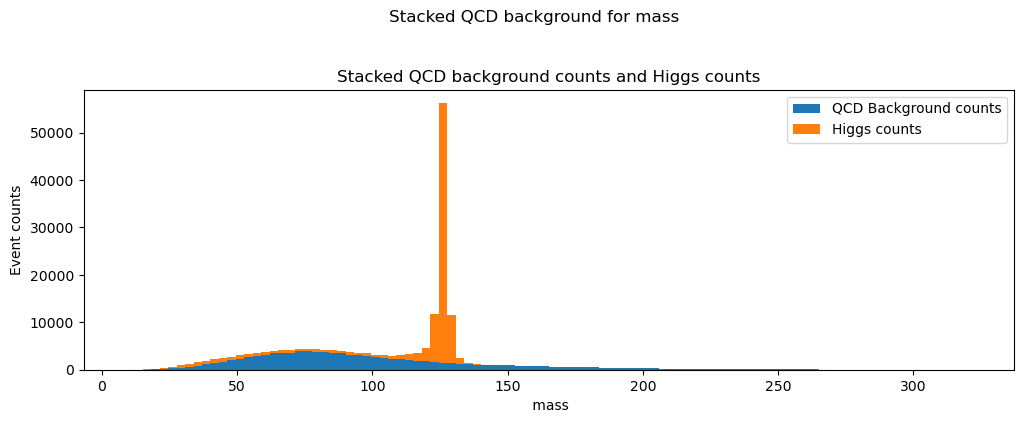

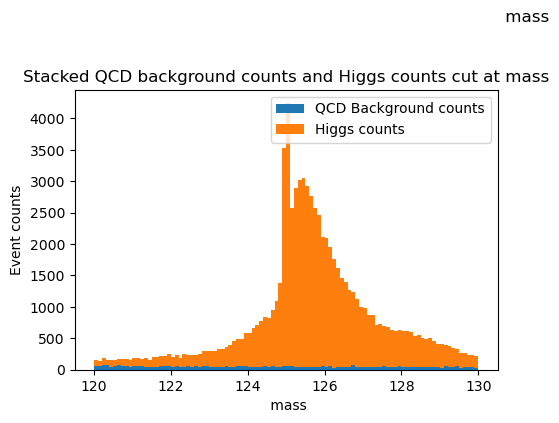

In [148]:
plot_stacked("mass")

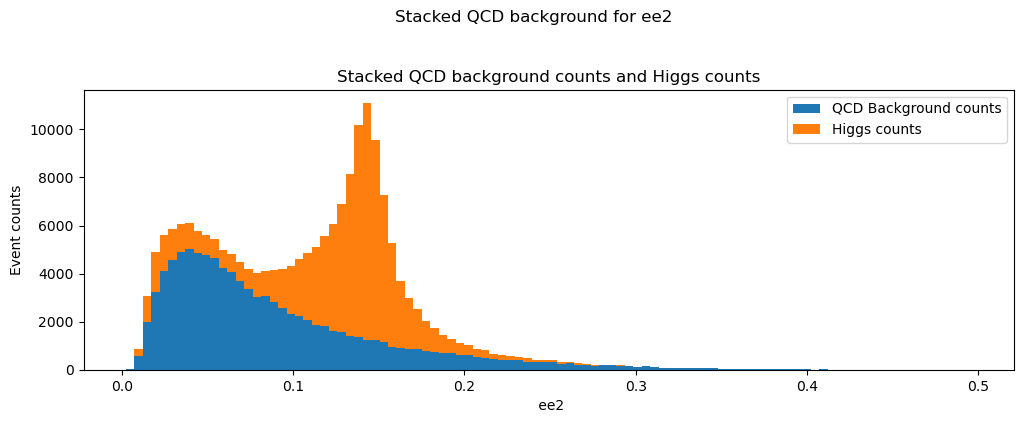

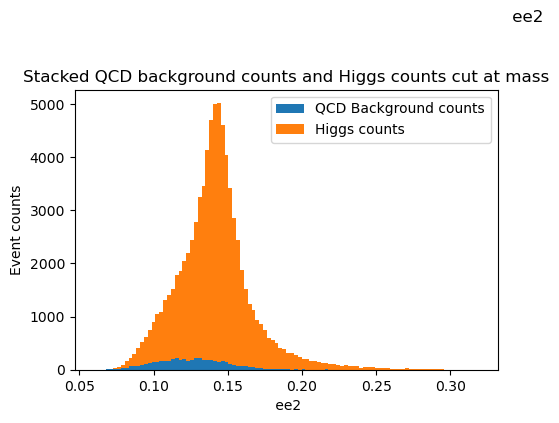

In [149]:
plot_stacked("ee2")

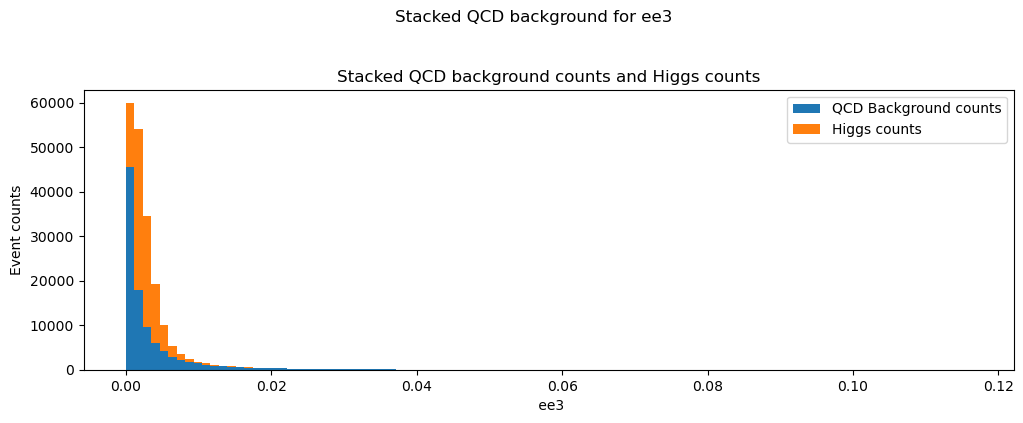

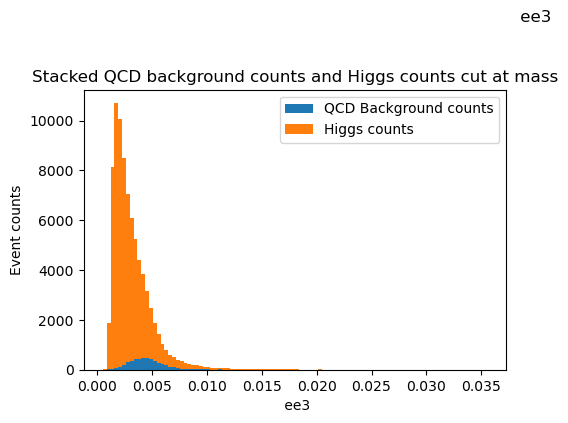

In [150]:
plot_stacked("ee3")

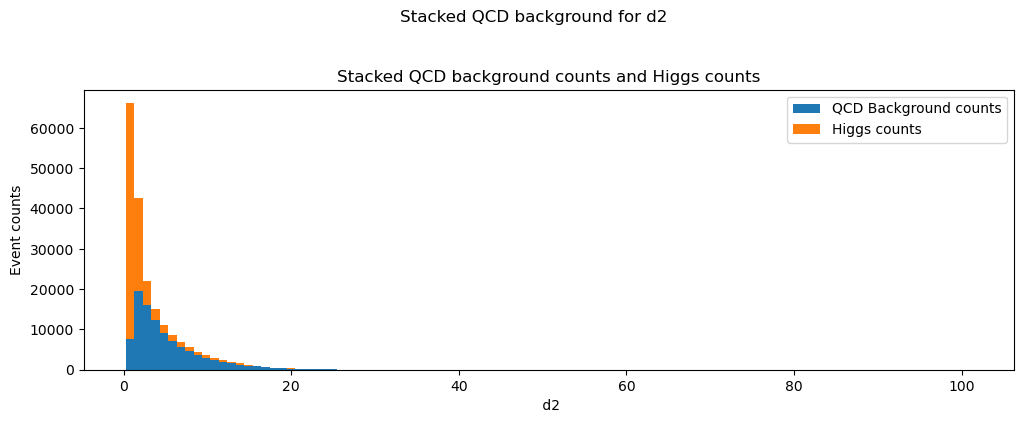

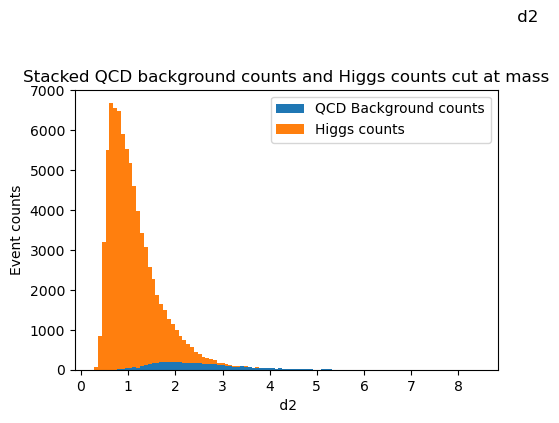

In [151]:
plot_stacked("d2")

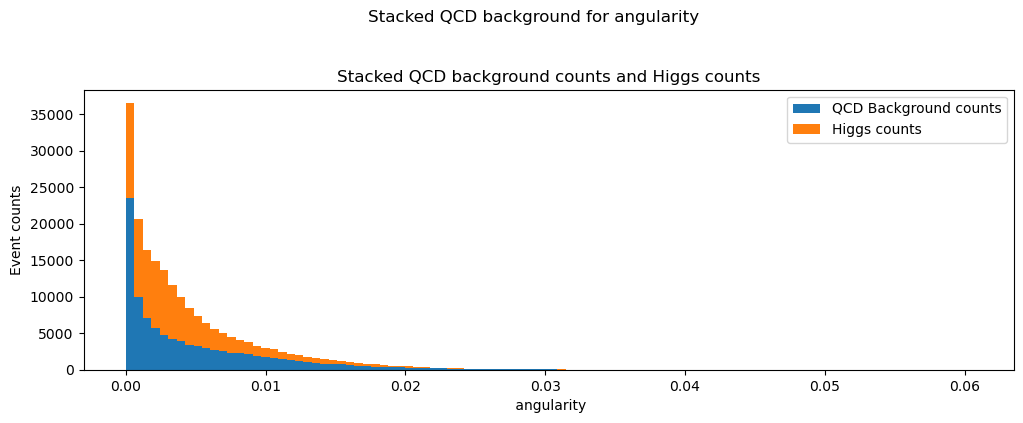

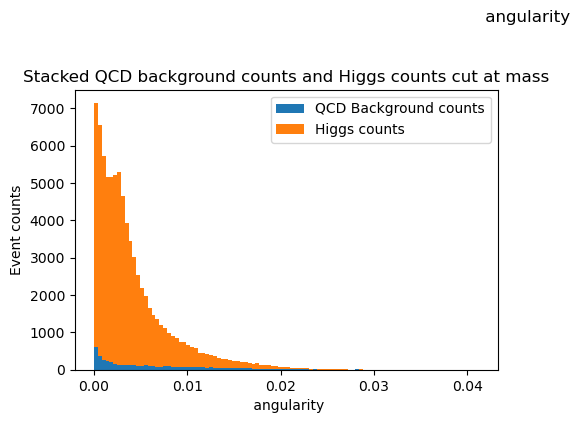

In [152]:
plot_stacked("angularity")

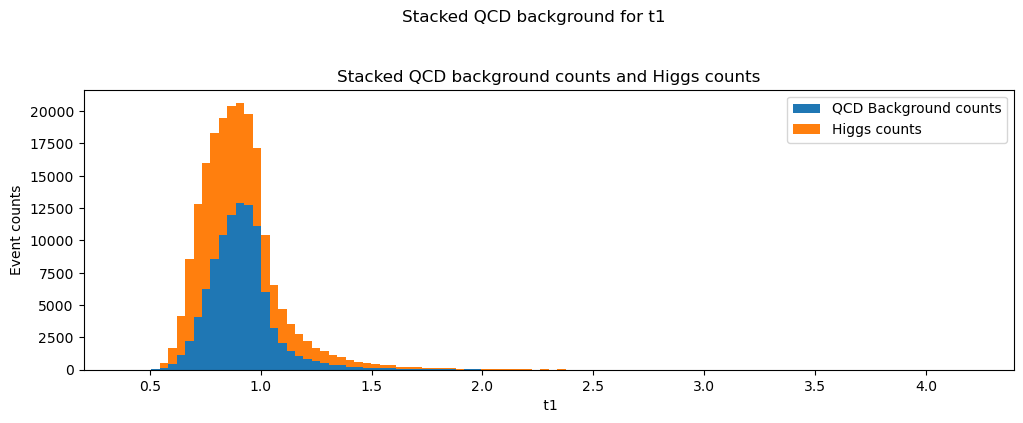

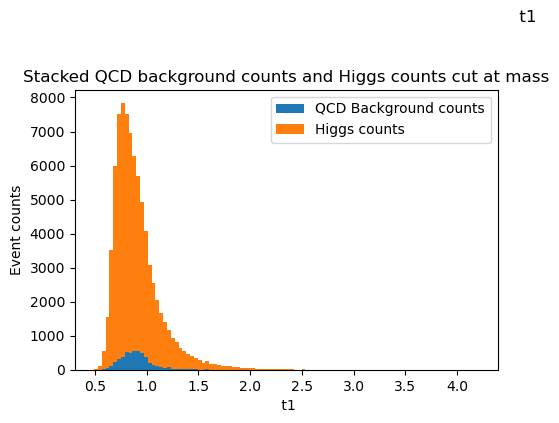

In [153]:
plot_stacked("t1")

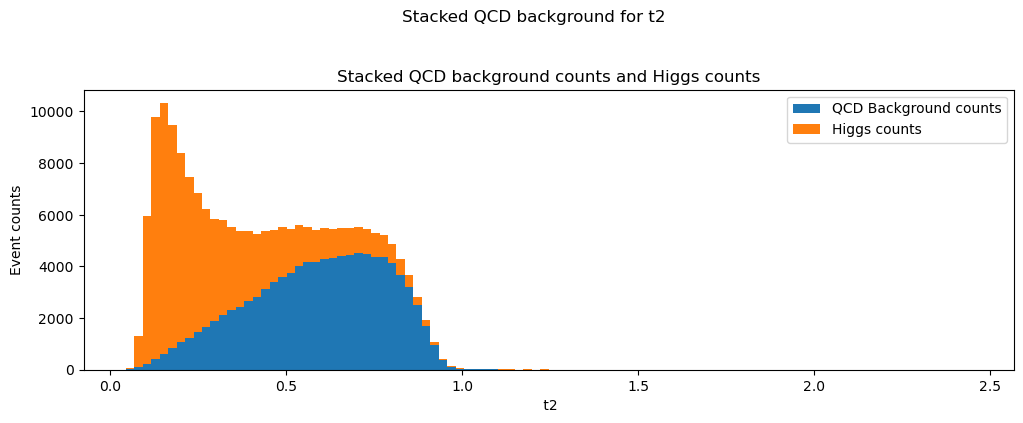

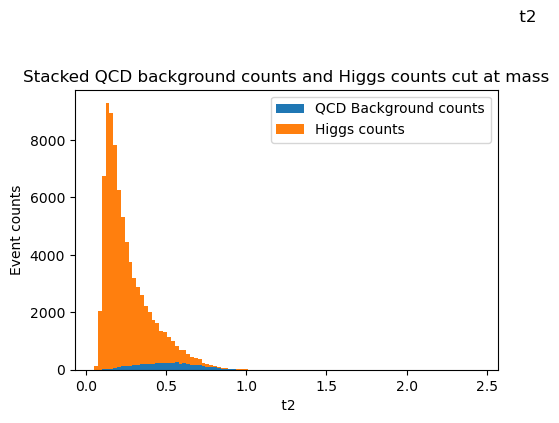

In [154]:
plot_stacked("t2")

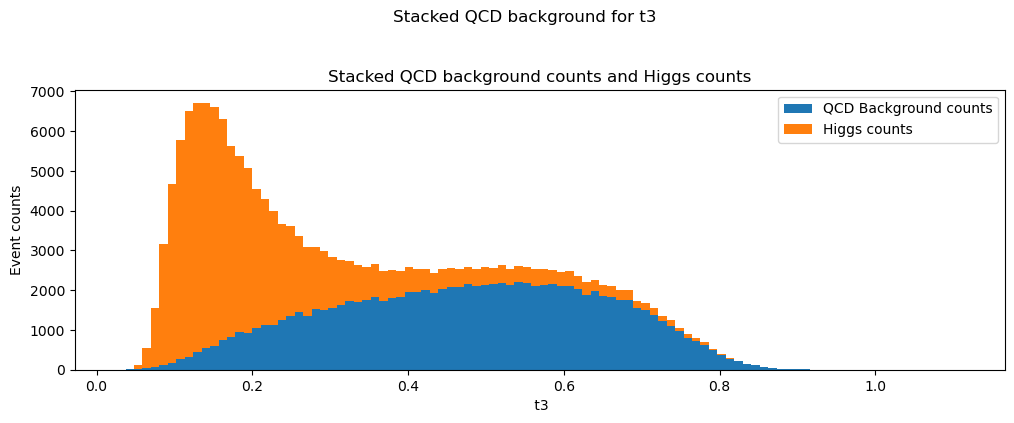

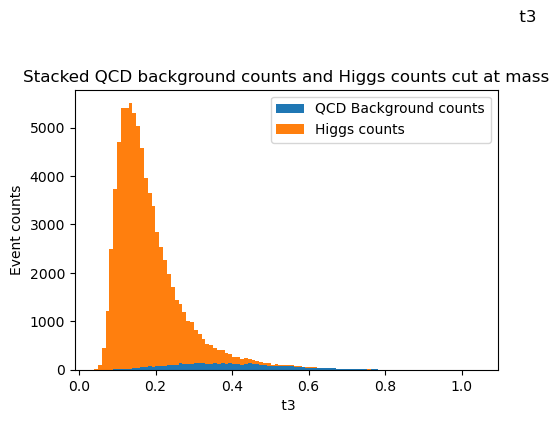

In [155]:
plot_stacked("t3")

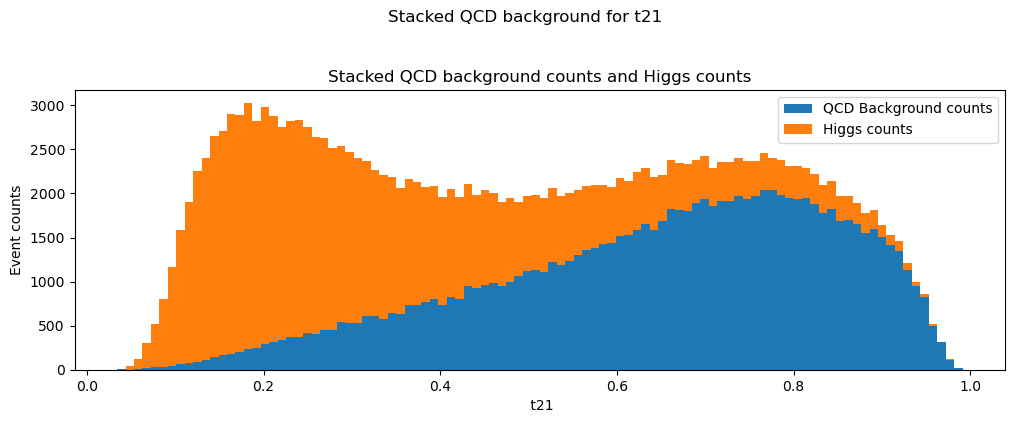

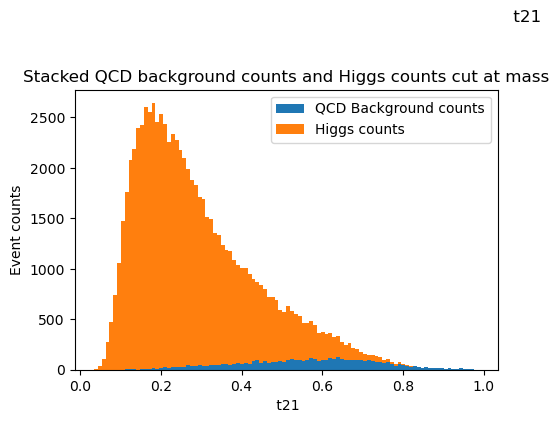

In [156]:
plot_stacked("t21")

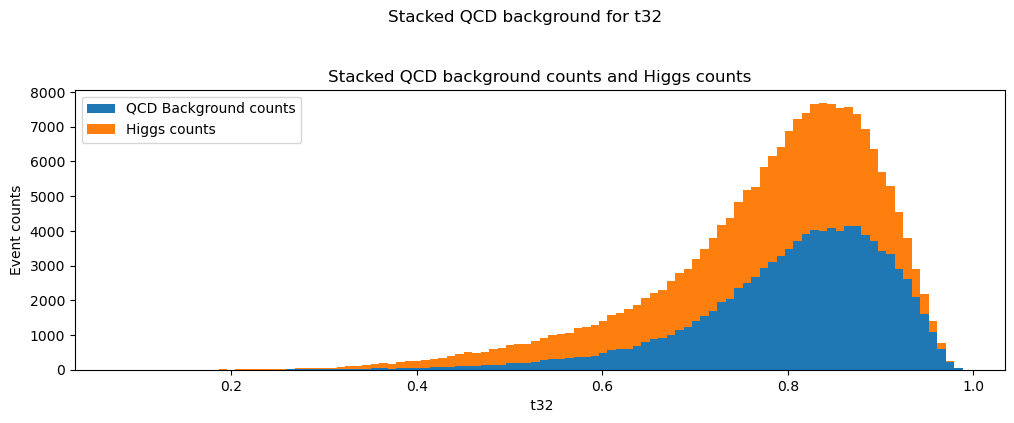

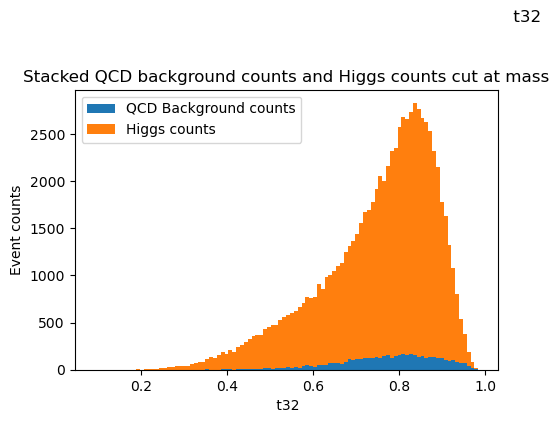

In [157]:
plot_stacked("t32")

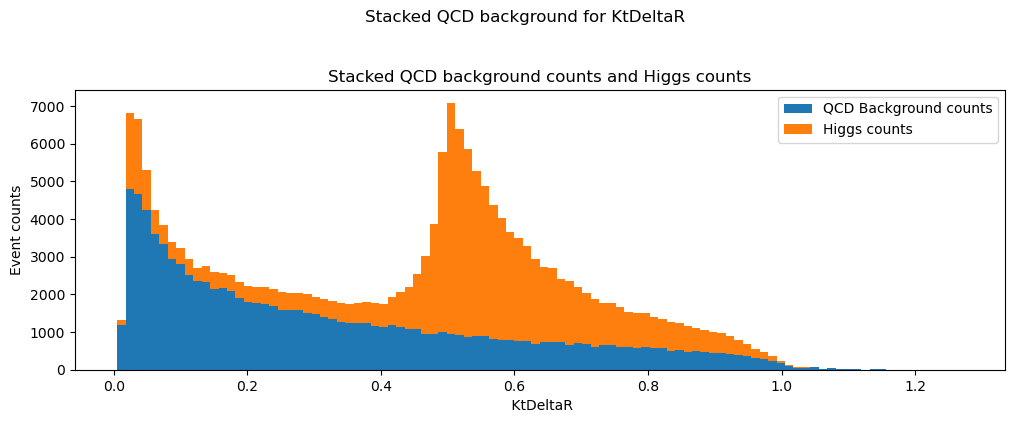

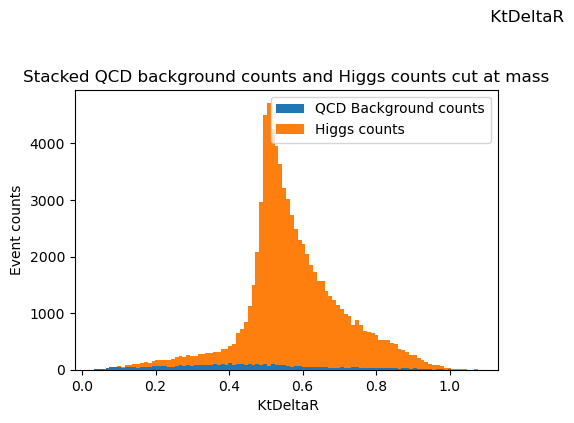

In [158]:
plot_stacked("KtDeltaR")

## Problem 4

In [ ]:
# qcd_cut3 = qcd_data[(qcd_data["mass"] >= 120) & (qcd_data["mass"] <= 130)]

In [160]:
new_cut_qcd = qcd_cut3[(qcd_cut3["KtDeltaR"] >= .4) & ((qcd_cut3["KtDeltaR"] <= .7))]

In [161]:
new_cut_higgs = higgs_cut3[(higgs_cut3["KtDeltaR"] >= .4) & ((higgs_cut3["KtDeltaR"] <= .7))]

In [164]:
cnt_cut_higgs = len(new_cut_higgs) * (.0005)
cnt_cut_higgs

29.675

In [165]:
cnt_cut_qcd = len(new_cut_qcd) * (.02)
cnt_cut_qcd

41.42

probability of signal

In [167]:
p = stats.poisson.sf(cnt_cut_higgs + cnt_cut_qcd, mu = cnt_cut_qcd)
p

1.0435870512413802e-05

In [168]:
stats.norm.isf(p)

4.2553551937918295